In [1]:
import os, sys
import importlib
from xmlrpc.client import MAXINT
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('c:\\main\\Work\\thesis\\Bachelor-Thesis\\Code\\hierarchical-clustering\\hierarchical_clustering.py'))))
import matplotlib.pyplot as plt
import pickle as pkl
import gc
import numpy as np
from treelib import Node, Tree
from timit.loading import Feature_Collector
from lib.conceptors import *
from lib.esn import ESN
from lib.helpers import *
from lib.plot import Plot
import warnings
warnings.filterwarnings("ignore")

###-------------- Collecting Training Features -------------------
path = '../timit/'
fc = Feature_Collector(path)

save = True

dr = []
speakers = []
long_version = False
n_mels = 10
delta = False
delta_delta = False
subsamples = 4

path_option = str(long_version)+"_"+str(n_mels)+"_"+str(delta)+"_"+str(delta_delta)+"_"+str(subsamples)

if dr:
    path_option = str(dr)+"_"+path_option
if speakers:
    path_option = str(speakers)+"_"+path_option
    
features,labels,oversamplings = fc.collectFeaturesInSegments(
    n_mels=n_mels,delta=delta,delta_delta=delta_delta,
    long_version=long_version,speakers=speakers,dr=dr,
    subsamples=subsamples,path_option=path_option)

gc.collect()

-from output
---- success


0

In [2]:
# run the reservoir with the signal(s) p1, p2, and p3 and collect X
group = {}
# { phoneme : samples }, where the samples = [ [x[0],x[1]...], [] ]
for i in range(len(features)):
    if labels[i] not in group.keys():
        group[labels[i]] = []
    group[labels[i]].append(features[i])
print(len(group.keys()))
print(np.median([len(x) for x in group.values()]))
group2 = {}
# Cut down to same number of samples
min_samples = max([len(samples) for samples in group.values()])
#for x,y in group.items():
#    if len(y) >= min_samples:
#        group2[x] = random.sample(y, min_samples)
#group = group2

phonemes = list(group.keys())
print(min_samples)
print(str(len(phonemes))+" phonemes")
#[print(x," ss ",len(y)) for x,y in group.items() ]

39
2709.0
39467
39 phonemes


In [3]:
# init reservoir
import random
random.seed(0)
np.random.seed(0)
t_washout = 0 # number of washout steps
aperture = 5
nb_trials = 1

esn_params = {
    "in_dim": n_mels*(1+delta+delta_delta),
    "out_dim": n_mels*(1+delta+delta_delta),
    "N": 10,
    "W_in_scale": 1.5,
    "b_scale": .2,
    "spectral_radius": 1.5
}

esn = ESN(esn_params)

In [4]:
Cs = []
for phoneme, signals in group.items():
    Z = np.array([])
    print(phoneme," - ", len(signals), " samples")
    for signal in signals[0:2]:
        z = esn.run(signal.T)
        Z = np.hstack([Z, z]) if Z.size else z
    Cs.append(np.mean(Z,1))

h#  -  39467  samples
w  -  3140  samples
ih  -  13693  samples
s  -  7475  samples
ah  -  6291  samples
ch  -  822  samples
n  -  8762  samples
ae  -  3997  samples
t  -  4364  samples
v  -  1994  samples
r  -  6539  samples
f  -  2216  samples
y  -  1715  samples
uw  -  2463  samples
sh  -  2389  samples
l  -  6752  samples
b  -  2181  samples
iy  -  6953  samples
aa  -  6004  samples
d  -  3548  samples
eh  -  3853  samples
p  -  2588  samples
z  -  3773  samples
ey  -  2282  samples
dx  -  2709  samples
ay  -  2390  samples
ng  -  1368  samples
k  -  4874  samples
dh  -  2826  samples
er  -  5453  samples
m  -  4027  samples
jh  -  1209  samples
g  -  2017  samples
ow  -  2136  samples
aw  -  729  samples
hh  -  2111  samples
uh  -  535  samples
oy  -  684  samples
th  -  751  samples


In [5]:
def similarity_c(x,y):
    return np.linalg.norm(x-y)

In [6]:
save = False
dist_fun = "baseline1"

if save and os.path.exists('./cache/working/'+dist_fun+'.pkl'):
    print("- from file")
    fp = open('./cache/working/'+dist_fun+'.pkl','rb')
    heat_map = pkl.load(fp)
    fp.close()
    print("--- Done")
else:
    print("- computing heatmap")
    heat_map = np.zeros((len(phonemes),len(phonemes)))

    for x in range(len(phonemes)):
        for y in range(0, x+1):
            sim = similarity_c(Cs[x], Cs[y])
            heat_map[x,y] = sim
            heat_map[y,x] = sim    
    if save:
        fp = open("./cache/working/"+dist_fun+".pkl",'wb')
        pkl.dump(heat_map,fp)
        fp.close()
    print("--- Done")

- computing heatmap
--- Done


In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
plt.figure(figsize=(17,15),dpi=200)
sns.set_theme()

ticklabels=phonemes
print(phonemes)
sns.set(font_scale=2)
labs = ['dh','v',"h#",'k','t','p','hh','g','d','b','dx','ah','ih','uw','ey','iy','eh','ae','ay','ow','aa','er','r','l','w','ng','n','m','y','z','s','sh','jh','f']
labs = ['g','d',"b",'dx','hh','dh','hh','g','d','b','dx','ah','ih','uw','ey','iy','eh','ae','ay','ow','aa','er','r','l','w','ng','n','m','y','z','s','sh','jh','f']

print(len(labs),len(phonemes))
reorder = [ phonemes.index(lab) for lab in labs]
hm = heat_map[reorder,:]
hm = hm[:,reorder]
ax = sns.heatmap(hm, xticklabels=labs, yticklabels=labs, linewidths=.5, center=np.mean(heat_map)-.06)

plt.rc('xtick', labelsize='20')    # fontsize of the tick labels
plt.rc('ytick', labelsize='20')

recs = [
    [1,1]
    
]

for rec in recs:
    ax.add_patch(
         patches.Rectangle(
             (rec[0], rec[0]),
             rec[1],
             rec[1],
             edgecolor='blue',
             fill=False,
             lw=5
         ) )

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

['h#', 'w', 'ih', 's', 'ah', 'ch', 'n', 'ae', 't', 'v', 'r', 'f', 'y', 'uw', 'sh', 'l', 'b', 'iy', 'aa', 'd', 'eh', 'p', 'z', 'ey', 'dx', 'ay', 'ng', 'k', 'dh', 'er', 'm', 'jh', 'g', 'ow', 'aw', 'hh', 'uh', 'oy', 'th']
34 39


IndexError: index 35 is out of bounds for axis 0 with size 34

<Figure size 3400x3000 with 0 Axes>

In [ ]:
coll = []
hm = heat_map.copy()

for t in range(len(phonemes)**2):
    max = 0
    maxx = 0
    maxy = 0
    for x in range(hm.shape[0]):
        for y in range(0, x):
            if max < hm[x,y]:
                max = hm[x,y]
                maxx = x
                maxy = y
    coll.append((phonemes[maxx],phonemes[maxy],hm[maxx,maxy]))
    hm[maxx, maxy] = 0

for x,y,val in coll:
    print(x," ",y," ",val)

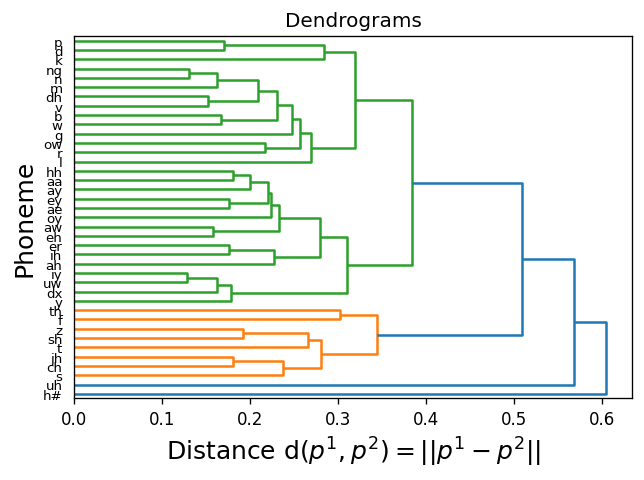

In [8]:
import scipy.cluster.hierarchy as sc
import scipy.spatial.distance as ssd

for i in range(heat_map.shape[0]):
    heat_map[i,i] = 0
distArray = ssd.squareform(heat_map)

if dist_fun == 'cos':
    distances = 1-distArray/np.max(distArray)
else:
    distances = distArray/np.max(distArray)

link = sc.linkage(distances, method='average', optimal_ordering=False)

# Plot dendrogram
plt.figure(dpi=120)
plt.title("Dendrograms")  
# Create dendrogram
sc.dendrogram(link,labels=phonemes,orientation='right',distance_sort=False)

#plt.title("Average Linkage on Phoneme Conceptors using Herbert's Distance Metric",fontsize=15)
plt.ylabel('Phoneme',fontsize=15)
plt.xlabel(r"Distance d$(p^1, p^2)=||p^1-p^2||$",fontsize=15)
plt.show()

In [5]:
import matplotlib.pyplot as plt
from math import floor
from matplotlib import gridspec

"""
Problem-specific plotting
"""
class Plot:
    def __init__(self, x, y):
        plt.rcParams["figure.autolayout"] = True
        self.fig = plt.figure(figsize=(y,x))
        self.cnt = 0
        self.new_ax = None

    def add(self, y, label=None):
        if label != None:
            self.new_ax.plot(y, label=label)
            self.new_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                                 ncol = 2, fancybox=True, shadow=True,
                                 handleheight=2.4, labelspacing=0.05)
        else:
            self.new_ax.plot(y)

    def inc(self):
        """Plots the data to a new subplot at the bottom."""
        self.cnt += 1
        gs = gridspec.GridSpec(self.cnt, 1)

        # Reposition existing subplots
        for i, ax in enumerate(self.fig.axes):
            ax.set_position(gs[i].get_position(self.fig))
            ax.set_subplotspec(gs[i])

        # Add new subplot
        self.new_ax = self.fig.add_subplot(gs[self.cnt-1])
        
        
    def add_new(self, y, label="No Label"):
        self.inc()
        self.add(y, label)

    def add_new_assignment_plot(self, assignments, labels=[], fuzzy=False, length=0):
        self.inc()
        for idx, ts in enumerate(assignments):
            if not fuzzy:
                y = []
                if length == 0:
                    length = max( [ max(ts) for ts in assignments if ts != [] ] )
                for t in range(length):
                    if t in ts:
                        y.append(1)
                    else:
                        y.append(0)
            else:
                y = ts
            if max(y) > 0:
                if labels == None:
                    self.add(smoothed(y,1))
                elif labels == []:
                    self.add(smoothed(y, 1), idx)
                else:
                    self.add(smoothed(y, 1), str(labels[idx]))


    def add_new_conceptors_fit_plot(self, X, Cs, Ns=None, label="", labels=""):
        """
        Plots, for each time step t, how well each conceptor in Cs matches the state x(t)
        """
        self.inc()
        if Ns:
            collection = evidences_for_Cs(X,Cs,Ns)
        else:
            collection, _ = test(X, Cs, "PROP")
        if labels:
            for vals, label in zip(collection, labels):
                # walking average of d
                self.add(smoothed(vals, 3), label=label)
        else:                
            for i, vals in enumerate(collection):
                # walking average of d
                self.add(smoothed(vals, 3), label=label+str(i))


    def finalize(self, title=""):
        self.fig.suptitle(title, fontsize=16)
        plt.show()

In [5]:
import librosa
from scipy.interpolate import CubicSpline

def getWavAndLabelInSegments(audio_path=None,phon_path=None,n_mels=15,delta=True,
delta_delta=True,long_version=False,subsamples=10):
    """
    Returns
    - labels: a list of phonemes
    - feature_vectors: all corresponding sections of the signal
    """
    oversamplings = 0
    if audio_path == None:
        raise Exception("Path to audio (Wav) file must be provided")
    wav,sr = fc.readAudio(fpath=audio_path,pre_emp=True)

    audio_phon_transcription = None
    if phon_path == None:
        phon_path = fc.getPhonPathFromAudioPath(audio_path)
    audio_phon_transcription = fc.readPhon(phon_path)
    split_wav = []
    labels = []

    for idx, row in audio_phon_transcription.iterrows():
        split_wav.append( wav[row['start']:row['end']] )
        try:
            if long_version:
                phoneme = row['phoneme']
            else:
                phoneme = fc.get39EquiOf61(row['phoneme'])
        except:
            phoneme = 'h#'
        labels.append(phoneme)

    return split_wav,labels

def getFeatureAndLabelInSegments(audio_path=None,phon_path=None,n_mels=15,delta=True,
delta_delta=True,long_version=False,subsamples=10):
    """
    Returns
    - labels: a list of phonemes
    - feature_vectors: all corresponding sections of the signal
    """
    oversamplings = 0
    if audio_path == None:
        raise Exception("Path to audio (Wav) file must be provided")
    wav,sr = fc.readAudio(fpath=audio_path,pre_emp=True)

    audio_phon_transcription = None
    if phon_path == None:
        phon_path = fc.getPhonPathFromAudioPath(audio_path)
    audio_phon_transcription = fc.readPhon(phon_path)
    split_wav = []
    labels = []

    for idx, row in audio_phon_transcription.iterrows():
        split_wav.append( wav[row['start']:row['end']] )
        try:
            if long_version:
                phoneme = row['phoneme']
            else:
                phoneme = fc.get39EquiOf61(row['phoneme'])
        except:
            phoneme = 'h#'
        labels.append(phoneme)

    feature_vectors = []

    for segment in split_wav:
        _,winlen,winstep = fc.getWindow(sr)
        db_melspec = librosa.feature.mfcc(segment,sr=sr,hop_length=winstep,win_length=winlen,n_mfcc=n_mels)

        mD = None
        mDD = None
        if(delta):
            width = db_melspec.shape[1] + db_melspec.shape[1] % 2 - 1 if db_melspec.shape[1] < 9 else 9
            mD = librosa.feature.delta(db_melspec, width=width)
            db_melspec = np.concatenate([db_melspec,mD])
            if(delta_delta):
                mDD = librosa.feature.delta(mD, width=width)
                db_melspec = np.concatenate([db_melspec,mDD])
        db_melspec = db_melspec.T

        if subsamples:
            if subsamples > db_melspec.shape[0]:
                oversamplings += 1
            cs = CubicSpline(np.arange(db_melspec.shape[0]), db_melspec)
            db_melspec = cs(np.linspace(0, db_melspec.shape[0], subsamples))
        feature_vectors.append( db_melspec )

    return feature_vectors,labels,oversamplings




In [7]:
# Plotting dataset
tddA = fc.getListAudioFiles('Test',speakers,dr)
tddA.index = range(tddA.shape[0])
feature_vectors = []
wav_vectors = []
labels = []


for i in range(20):
    wavs,lvs = getWavAndLabelInSegments(audio_path=tddA.loc[i][fc.f_Path],n_mels=n_mels,
    delta=delta,delta_delta=delta_delta,long_version=long_version,subsamples=subsamples)
    
    fv,lv,_ = getFeatureAndLabelInSegments(audio_path=tddA.loc[i][fc.f_Path],n_mels=n_mels,
    delta=delta,delta_delta=delta_delta,long_version=long_version,subsamples=subsamples)

    for feature in fv:
        feature_vectors.append(np.asarray(np.array(feature,dtype=object)).astype(np.float32))
        
    for feature in wavs:
        wav_vectors.append(np.asarray(np.array(feature,dtype=object)).astype(np.float32))

    labels += lv
    normalize = True
    if normalize:
        extreme_val = max( [max(fv.max(), -fv.min()) for fv in feature_vectors] )
        feature_vectors = [ fv/extreme_val for fv in feature_vectors ]


In [13]:
print(Cs[0])

[[ 6.13564491e-02  3.43732975e-03 -1.45202510e-03 ... -1.82432038e-03
  -2.46387015e-03 -3.22717672e-03]
 [ 3.43732975e-03  2.14702188e-02  1.00688373e-03 ...  1.12198477e-03
  -5.19998314e-04 -3.51448378e-04]
 [-1.45202510e-03  1.00688373e-03  2.26190334e-02 ... -5.01030586e-04
  -2.96545150e-05  2.99923393e-04]
 ...
 [-1.82432038e-03  1.12198477e-03 -5.01030586e-04 ...  8.89970959e-02
  -9.55124378e-03 -1.62408945e-03]
 [-2.46387015e-03 -5.19998314e-04 -2.96545150e-05 ... -9.55124378e-03
   3.70744273e-02  6.71366169e-03]
 [-3.22717672e-03 -3.51448378e-04  2.99923393e-04 ... -1.62408945e-03
   6.71366169e-03  8.18093804e-03]]


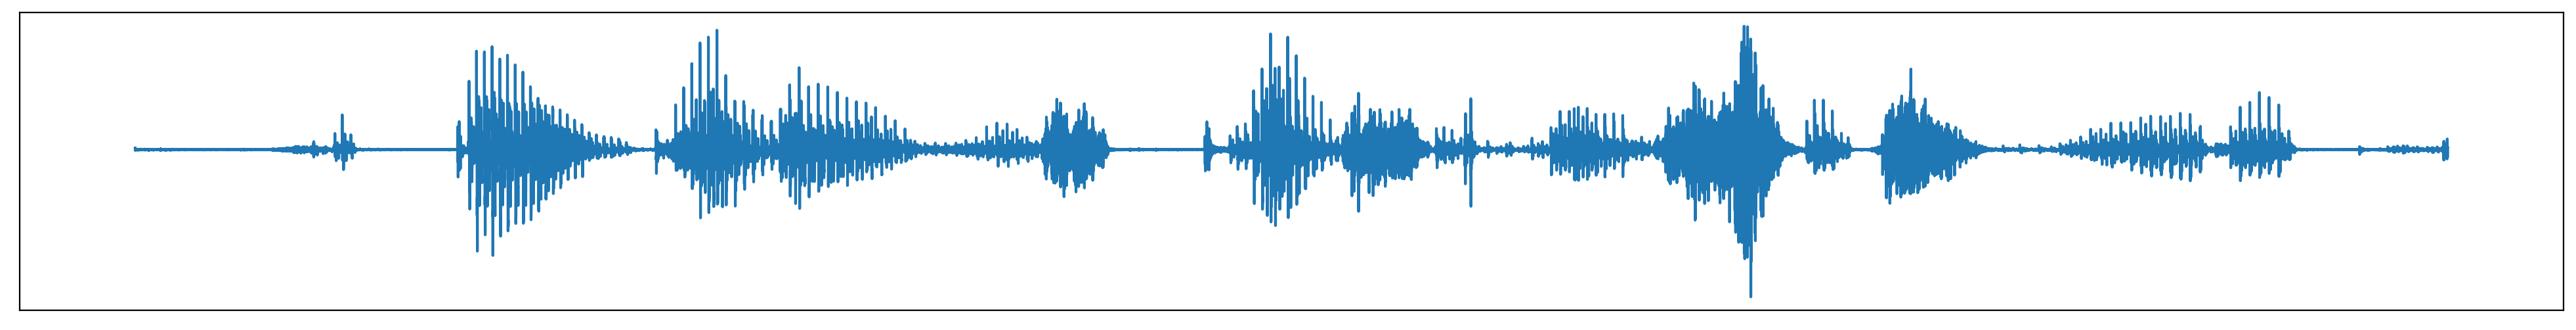

In [11]:

wavs,lvs = getWavAndLabelInSegments(audio_path=tddA.loc[0][fc.f_Path],n_mels=n_mels,
delta=delta,delta_delta=delta_delta,long_version=long_version,subsamples=subsamples)

wavs=wavs[:35]
lvs=lvs[:35]


fig, ax = plt.subplots(figsize=(25,3),dpi=200)

ship = 0
ticks = []
#for i, wav in enumerate(wavs):
#    plt.axvline(x=ship, color='orange')
#    lab = lvs[i]
#    pos = ship + len(wav) / 2
#    ship += len(wav)
#    ticks.append(pos)
#plt.axvline(x=ship, color='orange')
#ax.set_xticks(ticks)
#ax.set_xticklabels(lvs)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.plot(np.concatenate((wavs)))
plt.show()

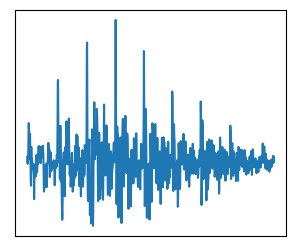

39 phonemes


In [13]:
groupwav = {}
groupmel = {}
for i in range(len(wav_vectors)):
    if labels[i] not in groupwav.keys():
        groupwav[labels[i]] = []
        groupmel[labels[i]] = []
    groupwav[labels[i]].append(wav_vectors[i])
    groupmel[labels[i]].append(feature_vectors[i])
phonemes = list(groupwav.keys())

fig, ax = plt.subplots(figsize=(3.5,3),dpi=100)
plt.plot(groupwav['iy'][2])#,label='/ah/ recording 2')
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
#plt.legend(prop={'size': 16}, loc='upper right')
plt.show()

#fig, ax = plt.subplots(figsize=(3.5,3),dpi=200)
#plt.plot(groupmel['ah'][1])#,label='/ah/ recording 2')
#plt.legend(prop={'size': 16}, loc='upper right')
#plt.show()


print(str(len(phonemes))+" phonemes")
#[print(x," ss ",len(y)) for x,y in groupwav.items() ]


In [29]:
from scipy import linalg, optimize

def assign_to_clusters_fixed(nb_points, nb_clusters):
    """
    Assigns points to conceptors according to one of several assignment methods
    Returns [[points in cluster 1], [points in cluster 2], ...]
    """
    assignments = [ [] for _ in range(nb_clusters) ]
    points = [ x for x in range(nb_points) ]
    np.random.shuffle(points)
    for i in range(nb_clusters):
        assignments[i] = points[i*int(nb_points/nb_clusters):(i+1)*int(nb_points/nb_clusters)]
    return assignments


def k_means_fixed(features, nb_clusters, max_epochs, new_assignments=None):
    nb_points = len(features)
    if new_assignments == None:
        new_assignments = assign_to_clusters_fixed(nb_points, nb_clusters)
    
    for epoch in range(max_epochs):
        print("epoch:",epoch)
        Cs_kmeans = []
        for assignments in new_assignments:
            if assignments != []:
                #C = features[assignments[0]]
                #for a in assignments:
                #C = OR_C( C, features[a] )
                l = np.array(features)
                C = np.mean(l[assignments,:,:],axis=0)
                Cs_kmeans.append(C)
        #Cs = optimize_apertures(Cs)
        old_assignments = new_assignments.copy()
        new_assignments = [ [] for _ in range(len(Cs_kmeans)) ]
        for p in range(nb_points):
            es = evidences
            similarities = [ similarity_c(C,features[p]) for C in Cs_kmeans ]
            conceptor_index = np.argmin(similarities)
            new_assignments[ conceptor_index ].append(p)
        
        for new_assignment in new_assignments:
            stop = False
            for old_assignment in old_assignments:
                if set(new_assignment) == set(old_assignment):
                    stop = True
            if stop:
                print("Converged")
                return Cs, new_assignments
    return Cs_kmeans, new_assignments

plot = Plot(10,10)

Cs_kmeans, assignments = k_means_fixed(Cs,9,15)

for i, assignment in enumerate(assignments):
    print("C"+str(i)+": ", [ list(group.keys())[a] for a in assignment ] )

epoch: 0
epoch: 1
Converged
C0:  ['w', 'ah', 'n', 'l', 'ng', 'hh']
C1:  ['h#', 'p', 'k']
C2:  ['b', 'd', 'dx', 'dh', 'g']
C3:  ['t', 'f', 'sh', 'z']
C4:  ['ih', 'y', 'iy']
C5:  ['ae', 'r', 'uw', 'aa', 'eh', 'ey', 'ay', 'er', 'ow']
C6:  ['s']
C7:  ['v', 'm']
C8:  ['jh']


<Figure size 720x720 with 0 Axes>

In [49]:
def assign_to_clusters(nb_points, nb_clusters):
    """
    Assigns points to conceptors according to one of several assignment methods
    Returns [[points in cluster 1], [points in cluster 2], ...]
    """
    assignments = [ [] for _ in range(nb_clusters) ]
    points = [ x for x in range(nb_points) ]
    np.random.shuffle(points)
    for i in range(nb_clusters):
        assignments[i] = points[i*int(nb_points/nb_clusters):(i+1)*int(nb_points/nb_clusters)]
    return assignments

def k_means(features, labels, nb_conceptors, max_epochs, new_assignments=None):
    """
    Kmeans algorithm, adapted to conceptors
    """
    # Initial assignments and initial conceptors
    nb_points = len(features)
    if new_assignments == None:
        new_assignments = assign_to_clusters(nb_points, nb_conceptors)
    # Training loop
    for epoch in range(max_epochs):
        print("epoch:",epoch)
        # recompute centroids based on subset of assigned state
        print("- computing conceptors")
        Cs = []
        for assignments in new_assignments:
            Z = np.array([])
            for assignment in assignments:
                z = esn.run(features[assignment].T)
                Z = np.hstack([Z, z]) if Z.size else z
            Cs.append(compute_c(Z, aperture))
        print("- computing negative conceptors")
        Ns = Ns_from_Cs(Cs)
        print("- optimizing +")
        Cs = optimize_apertures(Cs)
        print("- optimizing -")    
        Ns = optimize_apertures(Ns)

        # recompute assignments by find the closest conceptor for each of the state points
        old_assignments = new_assignments.copy()
        new_assignments = [ [] for _ in range(nb_conceptors) ]
        for p in range(nb_points):
            z = esn.run(features[p].T)    
            conceptor_index = np.argmax(np.array(evidences_for_Cs_z(z,Cs,Ns)))
            new_assignments[ conceptor_index ].append(p)

        # stop if converged
        for new_assignment, old_assignment in zip(new_assignments, old_assignments):
            if set(new_assignment) == set(old_assignment):
                print("Converged")
                return Cs, Ns, new_assignments
    return Cs, Ns, new_assignments


plot = Plot()

feats = []
labs = []

for key, val in group.items():
    feats += val
    labs += [key for _ in range(len(val))]
temp = list(zip(feats, labs))
random.shuffle(temp)
feats, labs = zip(*temp)

Cs_kmeans, Ns_kmeans, assignments = k_means(feats,labs,len(phonemes),max_epochs=15,new_assignments=assignments)

epoch: 0
- computing conceptors
- computing negative conceptors
- optimizing +
Computing gammas...
1  of  34
2  of  34
3  of  34
4  of  34
5  of  34
6  of  34
7  of  34
8  of  34
9  of  34
10  of  34
11  of  34
12  of  34
13  of  34
14  of  34
15  of  34
16  of  34
17  of  34
18  of  34
19  of  34
20  of  34
21  of  34
22  of  34
23  of  34
24  of  34
25  of  34
26  of  34
27  of  34
28  of  34
29  of  34
30  of  34
31  of  34
32  of  34
33  of  34
34  of  34
Adapting...
- optimizing -
Computing gammas...
1  of  34
2  of  34
3  of  34
4  of  34
5  of  34
6  of  34
7  of  34
8  of  34
9  of  34
10  of  34
11  of  34
12  of  34
13  of  34
14  of  34
15  of  34
16  of  34
17  of  34
18  of  34
19  of  34
20  of  34
21  of  34
22  of  34
23  of  34
24  of  34
25  of  34
26  of  34
27  of  34
28  of  34
29  of  34
30  of  34
31  of  34
32  of  34
33  of  34
34  of  34
Adapting...
epoch: 1
- computing conceptors
- computing negative conceptors
- optimizing +
Computing gammas...
1  of  34
2  

12  of  34
13  of  34
14  of  34
15  of  34
16  of  34
17  of  34
18  of  34
19  of  34
20  of  34
21  of  34
22  of  34
23  of  34
24  of  34
25  of  34
26  of  34
27  of  34
28  of  34
29  of  34
30  of  34
31  of  34
32  of  34
33  of  34
34  of  34
Adapting...
- optimizing -
Computing gammas...
1  of  34
2  of  34
3  of  34
4  of  34
5  of  34
6  of  34
7  of  34
8  of  34
9  of  34
10  of  34
11  of  34
12  of  34
13  of  34
14  of  34
15  of  34
16  of  34
17  of  34
18  of  34
19  of  34
20  of  34
21  of  34
22  of  34
23  of  34
24  of  34
25  of  34
26  of  34
27  of  34
28  of  34
29  of  34
30  of  34
31  of  34
32  of  34
33  of  34
34  of  34
Adapting...
epoch: 10
- computing conceptors
- computing negative conceptors
- optimizing +
Computing gammas...
1  of  34
2  of  34
3  of  34
4  of  34
5  of  34
6  of  34
7  of  34
8  of  34
9  of  34
10  of  34
11  of  34
12  of  34
13  of  34
14  of  34
15  of  34
16  of  34
17  of  34
18  of  34
19  of  34
20  of  34
21  of  34
2

In [ ]:
sims_Cs = np.zeros((len(phonemes),len(phonemes))) # Cs x Cs_kmeans

matches = 0
for x in range(len(phonemes)):
    for y in range(len(phonemes)):
        sim = similarity_c(Cs[x], Cs_kmeans[y])
        sims_Cs[x,y] = sim

dic = {}
for _ in range(len(phonemes)):
    C, C_kmeans = np.unravel_index(sims_Cs.argmax(), sims_Cs.shape)
    dic[phonemes[C]] = C_kmeans
    overlaps[C_idx,:] = np.zeros((1,len(phoenemes)))
    overlaps[:,phoneme_idx] = np.zeros((len(phoenemes),1))

print(matches / len(phonemes))
print("Random would be 1 <3")

In [50]:
overlaps = np.zeros((len(phonemes), len(phonemes))) # (Cs x phonemes)

for C_idx, assignment in enumerate(assignments):
    for idx in assignment:
        overlaps[C_idx, phonemes.index(labs[idx])] += 1

dic = {}

for _ in range(len(phonemes)):
    C_idx, phoneme_idx = np.unravel_index(overlaps.argmax(), overlaps.shape)
    dic[phonemes[phoneme_idx]] = C_idx
    overlaps[C_idx,:] = np.zeros((1,len(phonemes)))
    overlaps[:,phoneme_idx] = np.zeros((len(phonemes),))

Cs_final = []
Ns_final = []
for phoneme in [p for p in phonemes if p in list(dic.keys()) ]:
    Cs_final.append(Cs_kmeans[dic[phoneme]])
    Ns_final.append(Ns_kmeans[dic[phoneme]])

In [51]:
#------ Custom test
correct = 0
n=0
fv, lv, _ = fc.collectFeaturesInSegments(
    ft='Test',n_mels=n_mels,delta=delta,delta_delta=delta_delta,
    long_version=long_version,speakers=speakers,dr=dr,subsamples=subsamples,
    path_option=path_option+"_test")

test_group = {}
for key in group.keys():
    test_group[key] = []

for i in range(len(fv)):
    if lv[i] in group.keys():
        test_group[lv[i]].append(fv[i])

for i,(x,y) in enumerate(test_group.items()):
    for sample in y[:200]:
        z = esn.run(sample.T)
        es = evidences_for_Cs_z(z,Cs_final,Ns_final)
        es = [ np.sum(p) for p in es ]
        correct += x==list(test_group.keys())[np.argmax(es)]
        n+=1
        #print(list(group.keys())[np.argmax(es)])

print("Accuracy: ",correct/n)
print("n_mels: ",n_mels)
print("d: ",delta)
print("dd: ",delta_delta)
print("speakers: ",speakers)
print("dr: ",dr)
print("dr: ",min_samples)
print("Test: ","Test")
print("subsamples: ",subsamples)
print("Neurons: ",esn_params["N"])
print("Aperture: ",aperture)

-from output
---- success
Accuracy:  0.17823529411764705
n_mels:  5
d:  False
dd:  False
speakers:  []
dr:  []
dr:  1100
Test:  Test
subsamples:  5
Neurons:  10
Aperture:  5
